In [16]:
import tensorflow as tf
import tensorflow.contrib.eager as tce


In [2]:
tf.enable_eager_execution()

In [10]:
v = tf.contrib.eager.Variable(2.0, name='cuong')

In [11]:
v

<tf.Variable 'cuong:0' shape=() dtype=float32, numpy=2.0>

In [12]:
v.assign(3.0)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=3.0>

In [13]:
v

<tf.Variable 'cuong:0' shape=() dtype=float32, numpy=3.0>

# Fitting a linear model

In [27]:
class Model(object):
    def __init__(self):
        self.W = tce.Variable(5.0)
        self.b = tce.Variable(0.0)
        
    def __call__(self, x):
        return self.W * x + self.b
    
model = Model()

In [30]:
assert model(3.0).numpy() == 15.0

In [31]:
def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

In [32]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs  = tf.random_normal(shape=[NUM_EXAMPLES])
noise   = tf.random_normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

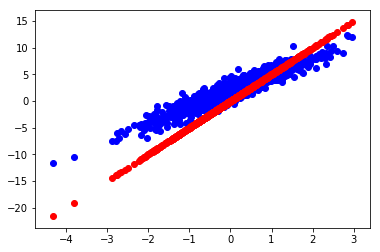

Current loss: 
8.8087225


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: '),
print(loss(model(inputs), outputs).numpy())

In [38]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    # descent hence going down
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

Epoch  0: W=5.00 b=0.00, loss=8.80872
Epoch  1: W=4.61 b=0.40, loss=5.98622
Epoch  2: W=4.29 b=0.72, loss=4.18313
Epoch  3: W=4.04 b=0.97, loss=3.03126
Epoch  4: W=3.84 b=1.18, loss=2.29539
Epoch  5: W=3.68 b=1.34, loss=1.82528
Epoch  6: W=3.55 b=1.47, loss=1.52494
Epoch  7: W=3.45 b=1.58, loss=1.33306
Epoch  8: W=3.37 b=1.66, loss=1.21046
Epoch  9: W=3.31 b=1.73, loss=1.13214


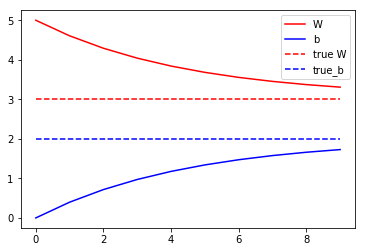

In [39]:
model = Model()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(model(inputs), outputs)

  train(model, inputs, outputs, learning_rate=0.1)
  print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))

# Let's plot it all
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()